# Results Analysis

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [19]:
file_path = "output.csv"
df = pandas.read_csv(file_path, encoding='utf-8')

### Results

In [ ]:
columns_of_interest = ['BLEU', 'METEOR', 'Rouge1 r', 'Rouge1 p', 'Rouge1 f', 'Rouge2 r', 'Rouge2 p', 'Rouge2 f', 
                       'Rougel r', 'Rougel p', 'Rougel f', 'LLM-Sim', 'LLM-Con']

mean_by_strategy = df.groupby("tamperingType")[columns_of_interest].mean()
median_by_strategy = df.groupby("tamperingType")[columns_of_interest].median()
std_by_strategy = df.groupby("tamperingType")[columns_of_interest].std()

print("Mean by Tampering Strategy:\n", mean_by_strategy)
print("\nMedian by Tampering Strategy:\n", median_by_strategy)
print("\nStandard Deviation by Tampering Strategy:\n", std_by_strategy)

mean_values = df[columns_of_interest].mean()
median_values = df[columns_of_interest].median()
std_values = df[columns_of_interest].std()

print("\nOverall Mean:\n", mean_values)
print("\nOverall Median:\n", median_values)
print("\nOverall Standard Deviation:\n", std_values)

Mean by Tampering Strategy:
                                 LLMScore  Confidence_Lower  Confidence_Upper  \
tamperingType                                                                  
Add random word                    0.965             0.930             0.995   
Duplicate Token                    0.980             0.950             1.000   
Duplicate character                0.990             0.980             1.000   
Negation                           0.200             0.125             0.275   
Remove Character                   0.990             0.980             1.000   
Remove Token                       0.925             0.875             0.975   
Replace Character                  0.990             0.980             1.000   
Replace Token with Random Word     0.800             0.725             0.875   
Swap characters                    0.995             0.985             1.000   
Swap words                         0.985             0.965             1.000   

          

### Plots mean and median for each metrics

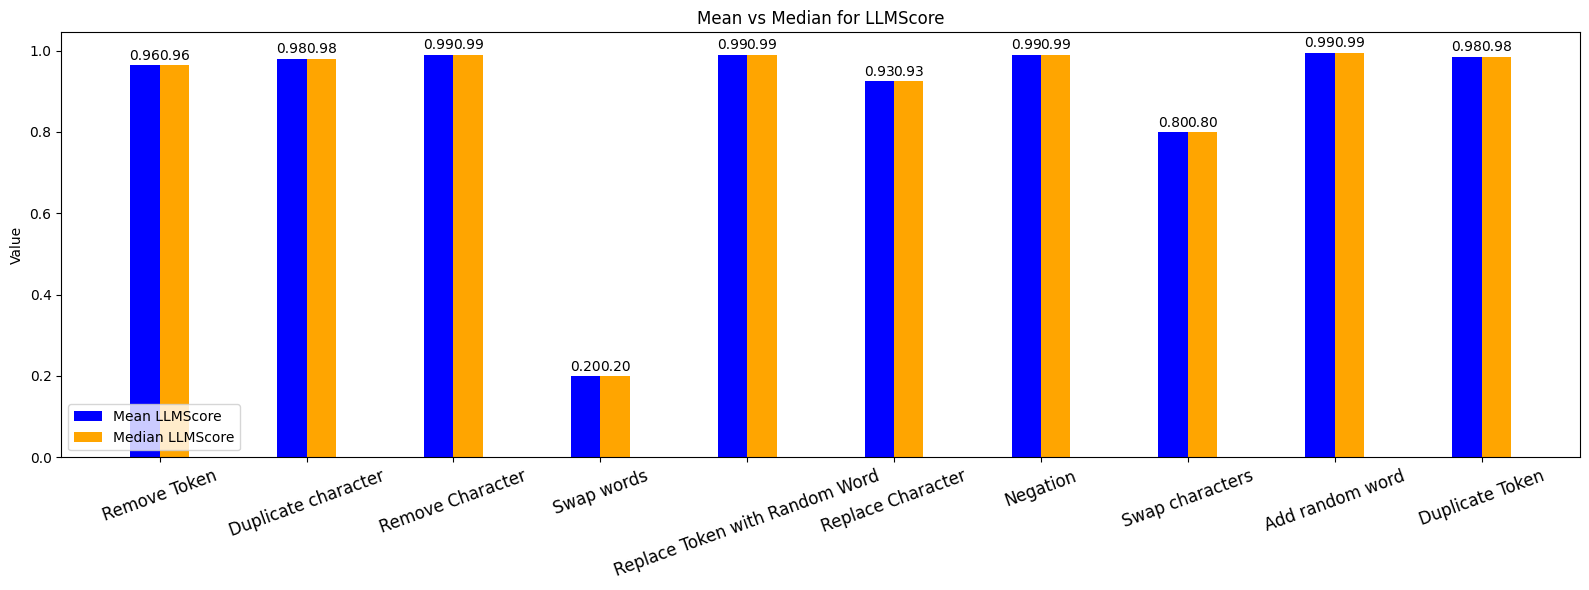

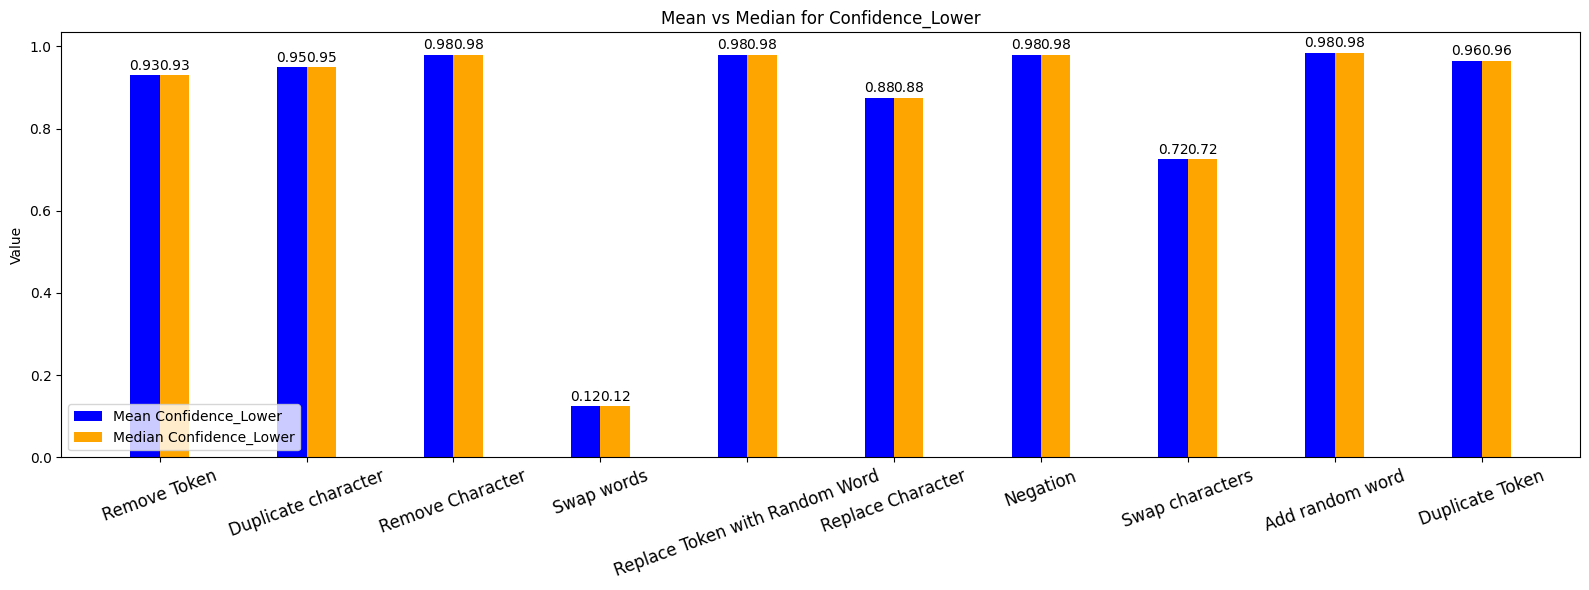

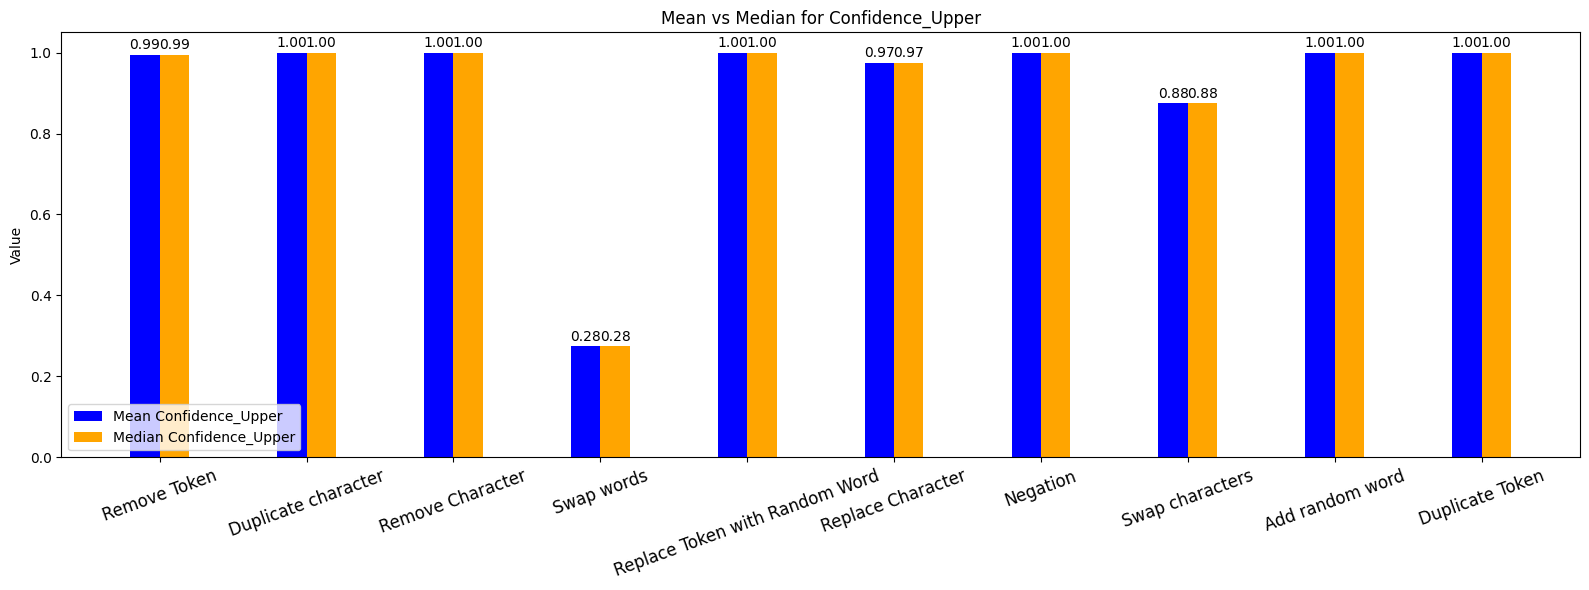

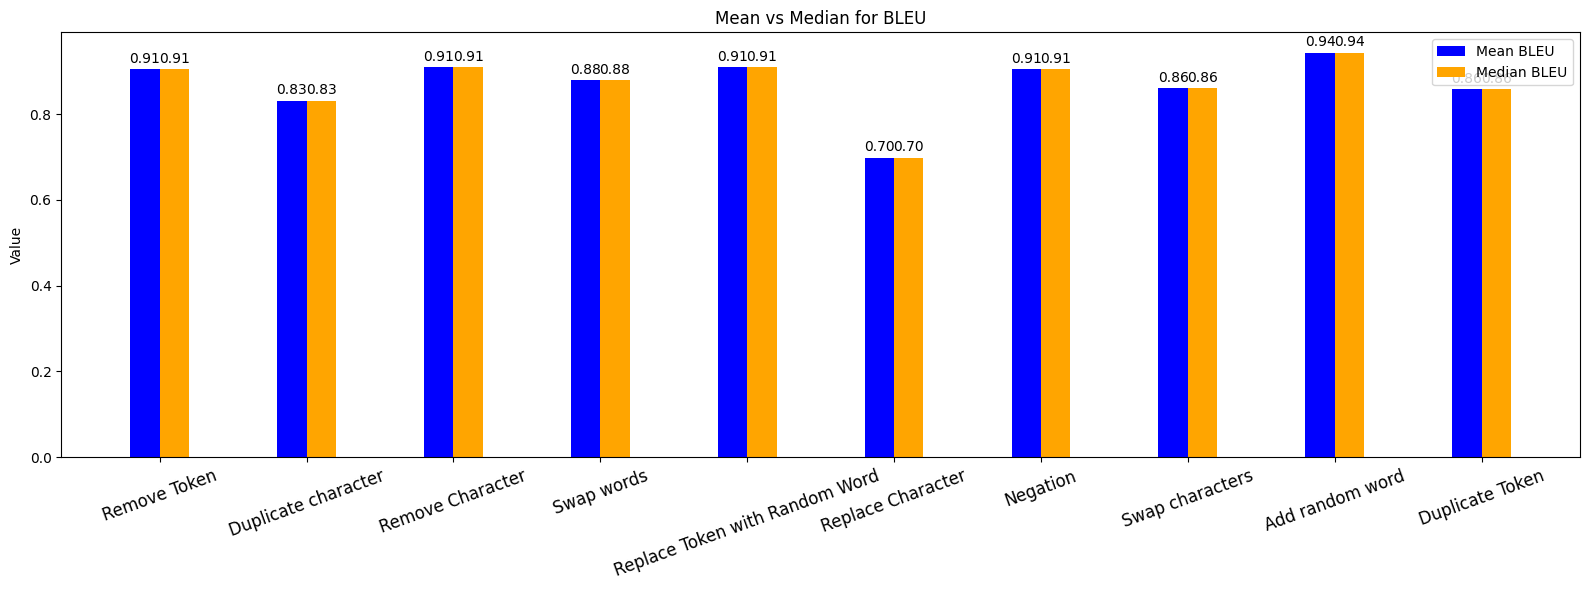

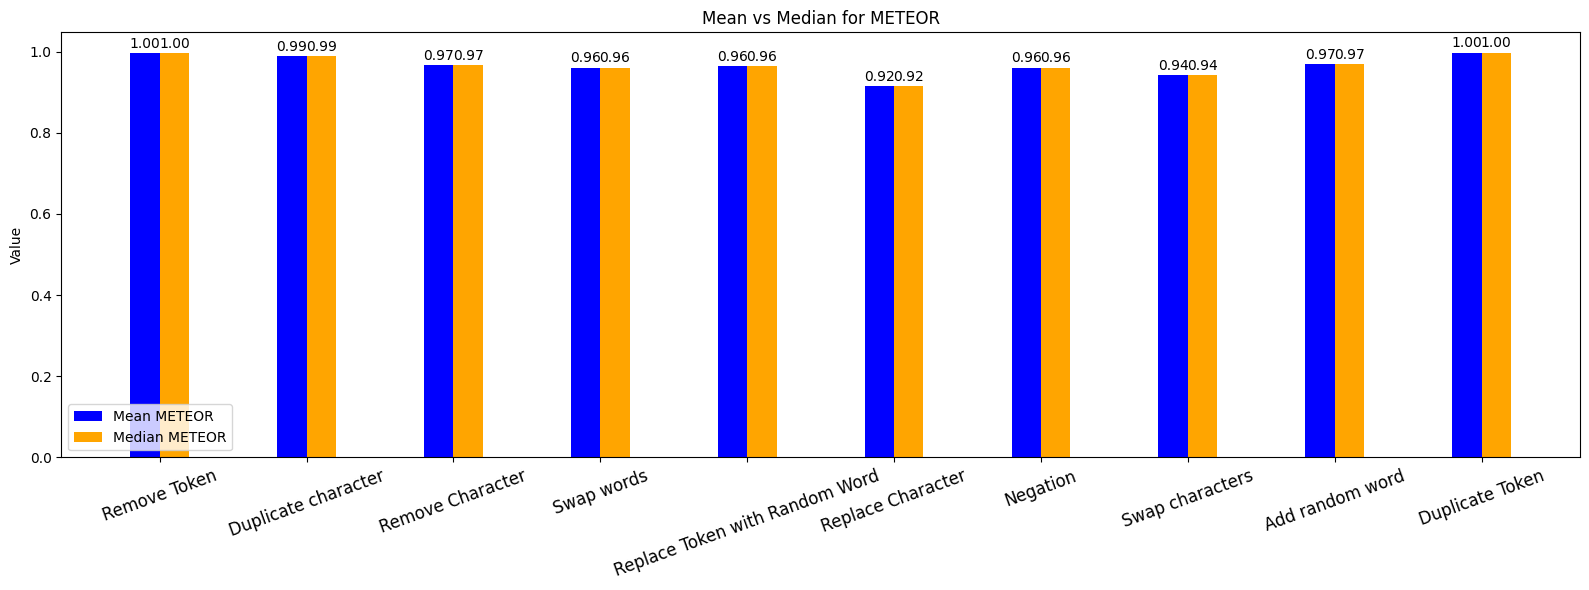

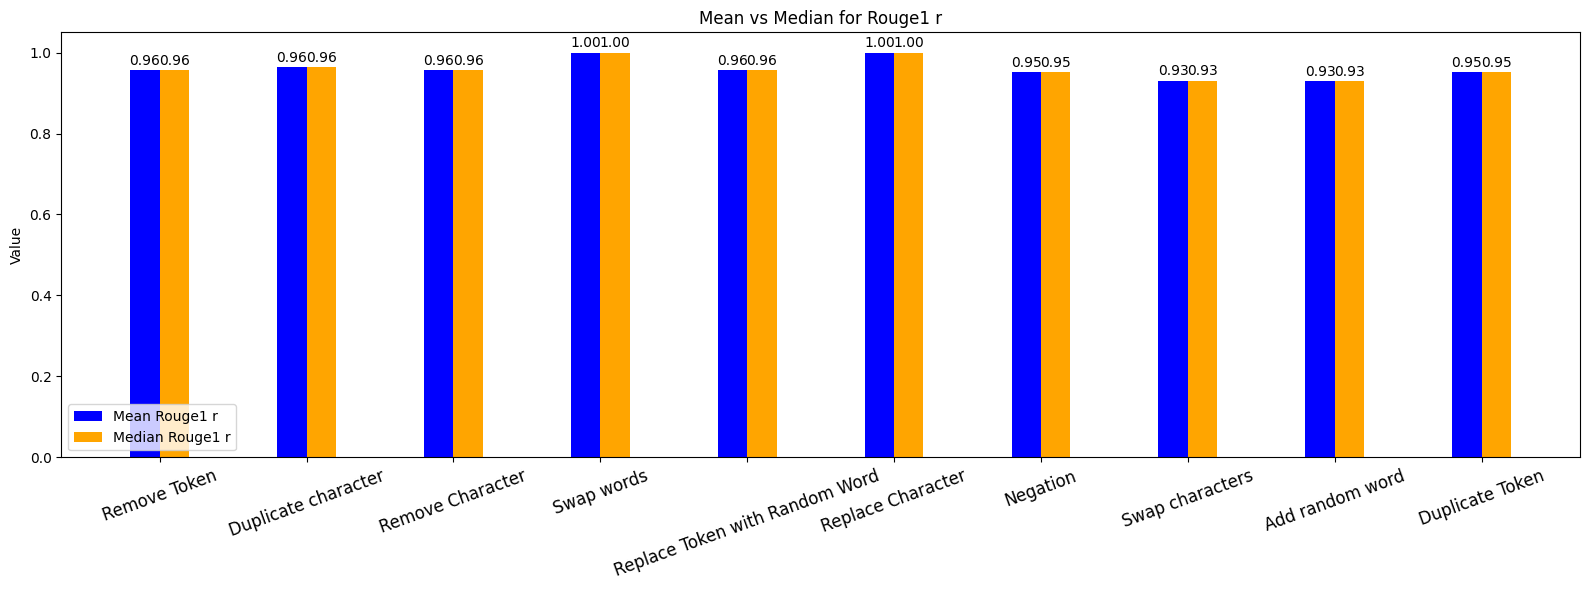

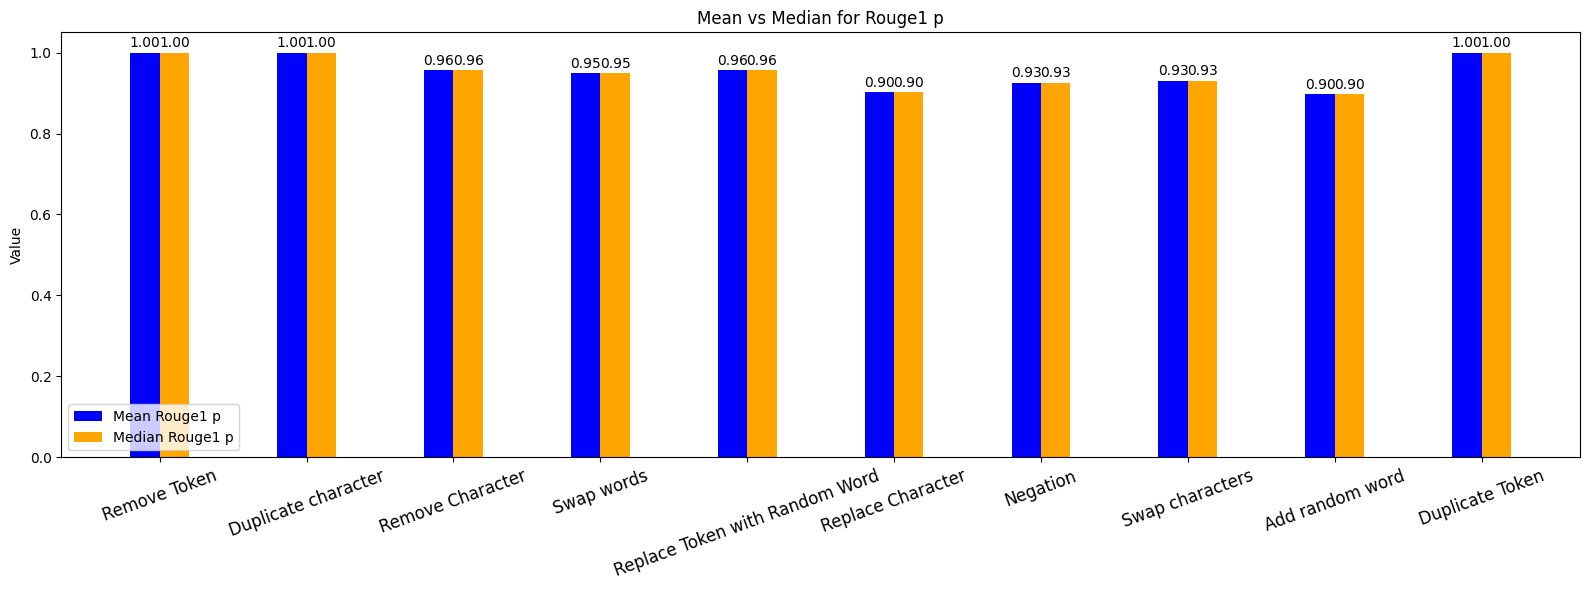

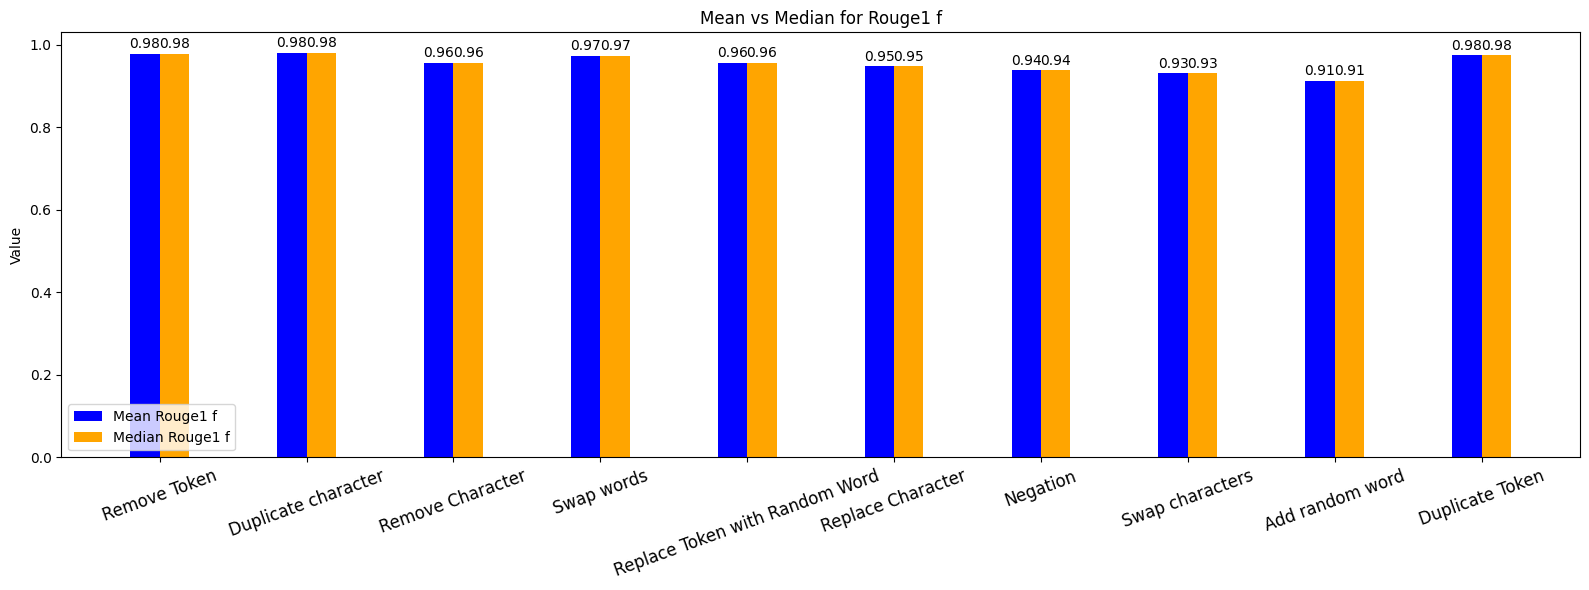

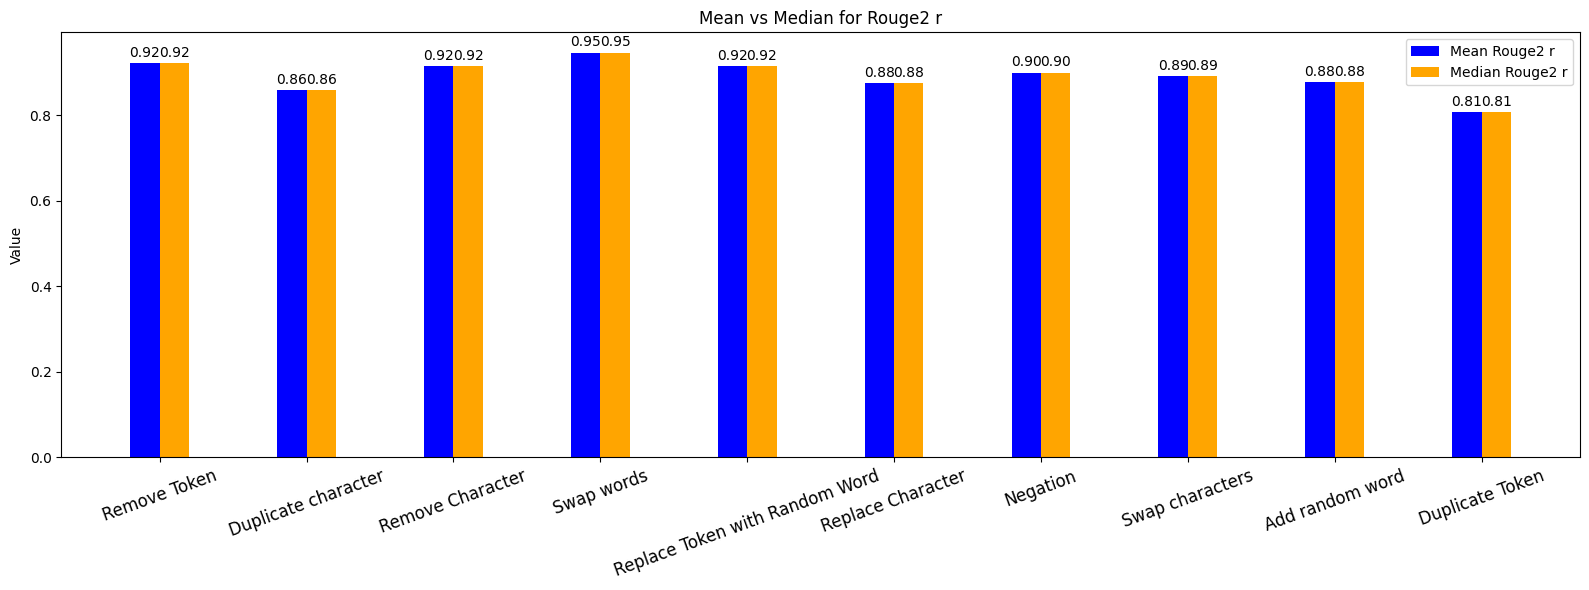

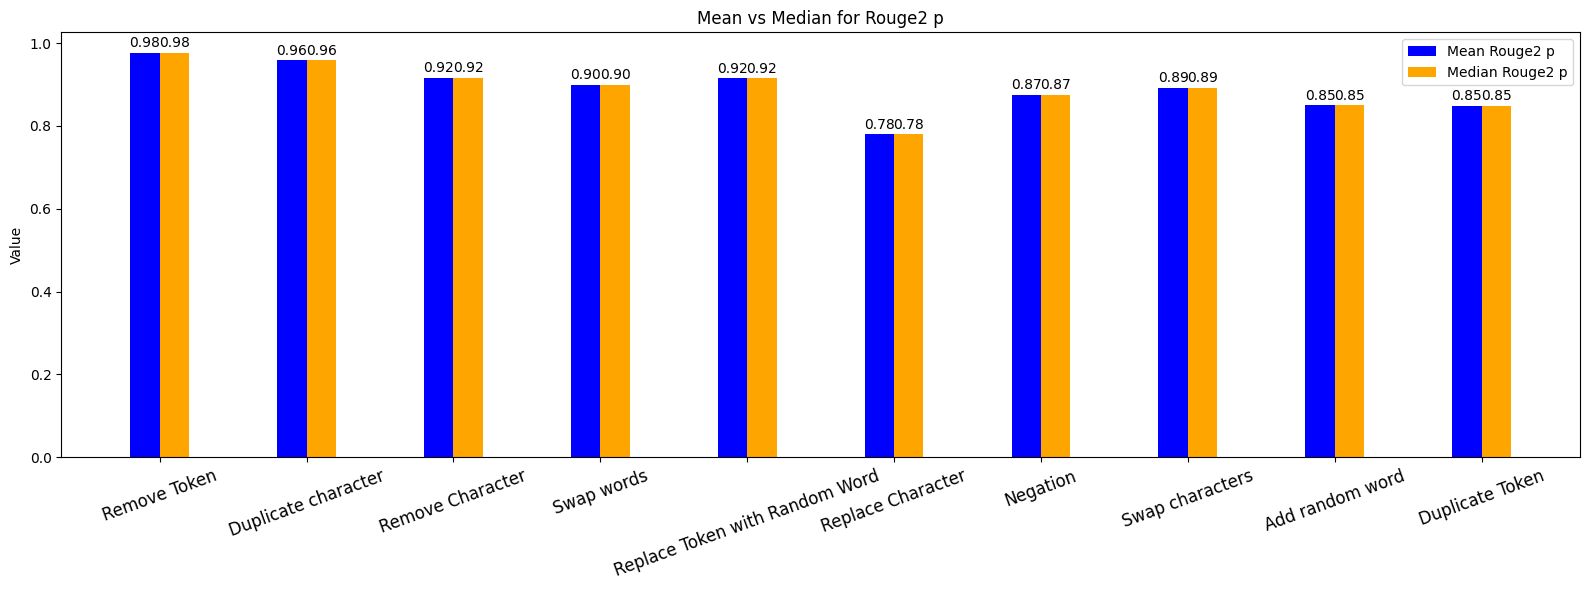

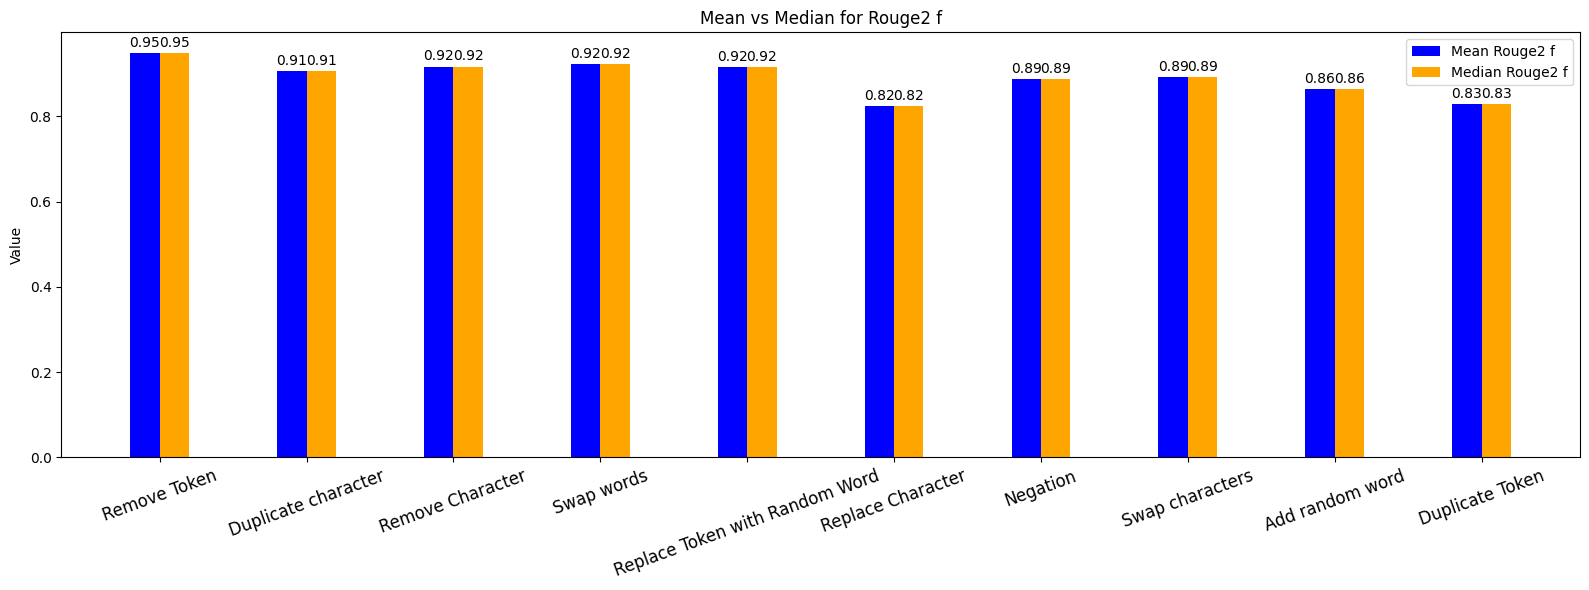

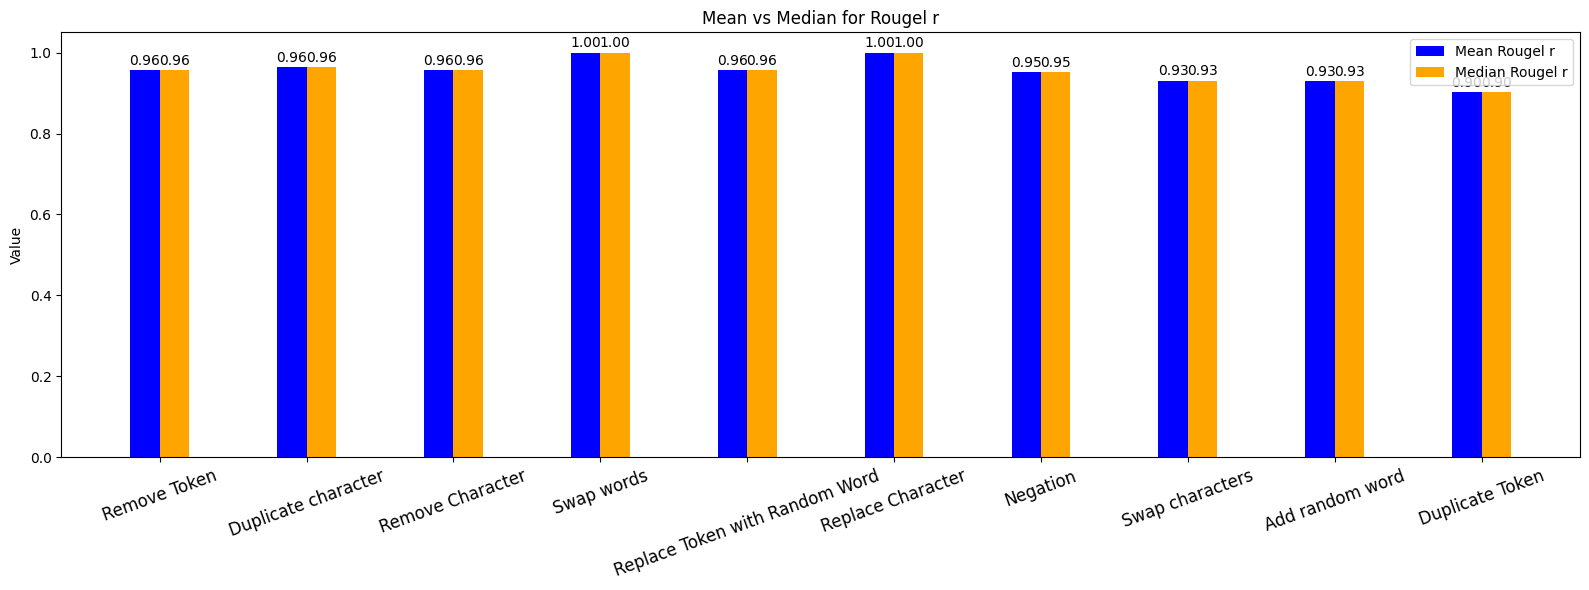

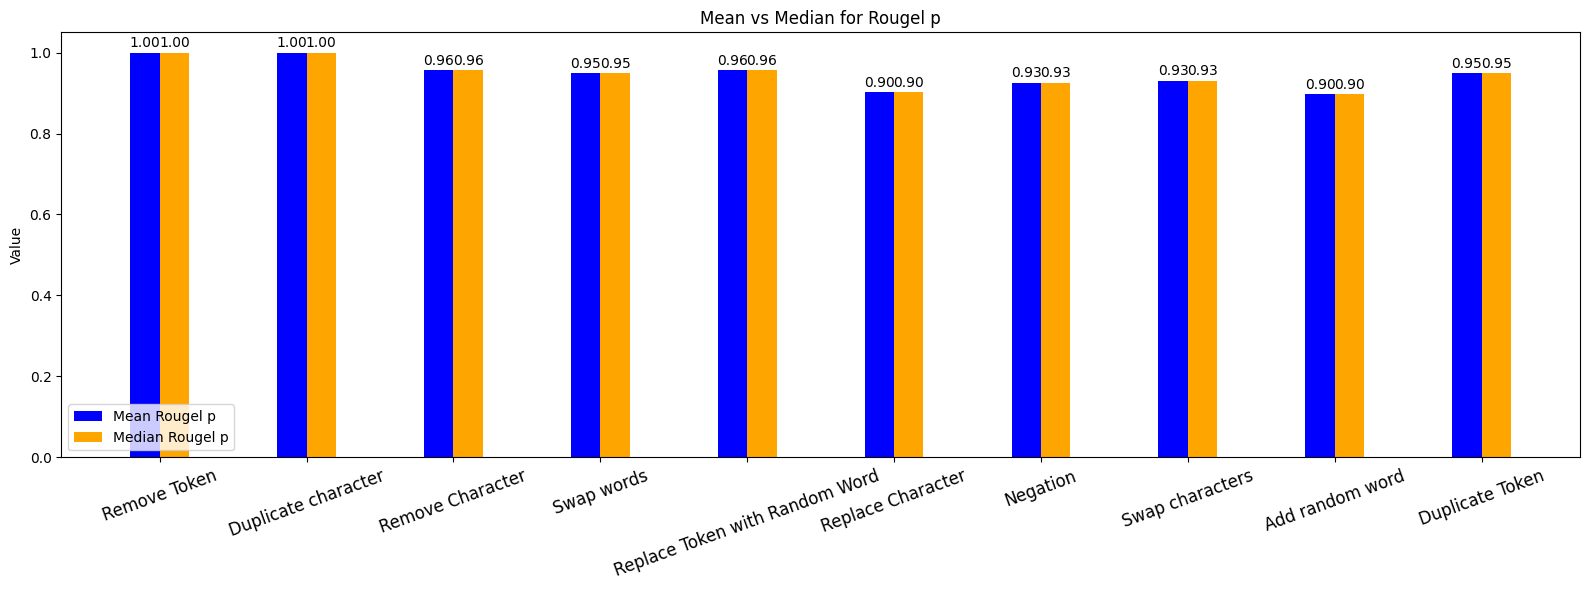

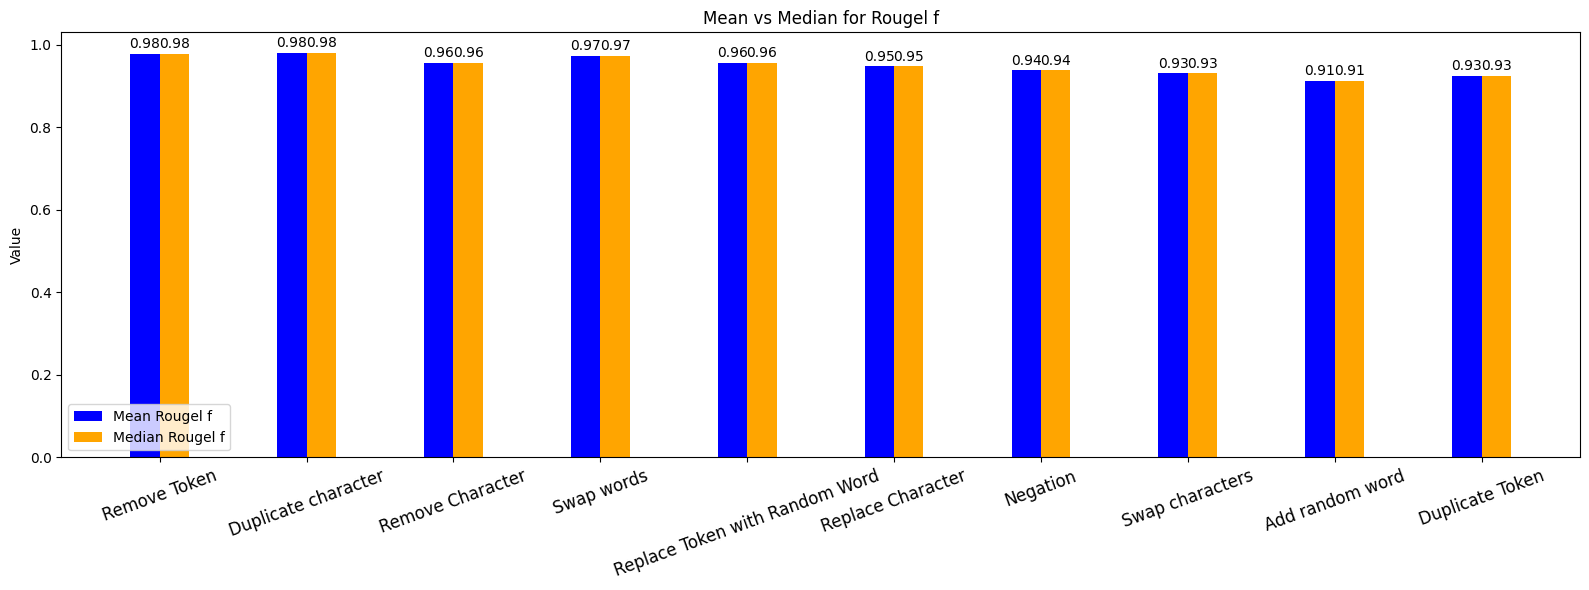

In [6]:
tampering_types = df["tamperingType"].unique()

width = 0.2 
x = np.arange(len(tampering_types)) 

for column in columns_of_interest:
    fig, ax = plt.subplots(figsize=(16, 6))  

    mean_values = mean_by_strategy[column].values
    median_values = median_by_strategy[column].values

    bars1 = ax.bar(x - width/2, mean_values, width, label=f'Mean {column}', color='blue')

    bars2 = ax.bar(x + width/2, median_values, width, label=f'Median {column}', color='orange')

    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    for bar in bars2:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.04, 
                f'{bar.get_height():.2f}', ha='center', va='top', fontsize=10, color='black')

    ax.set_ylabel('Value')
    ax.set_title(f'Mean vs Median for {column}')
    ax.set_xticks(x)
    ax.set_xticklabels(tampering_types, rotation = 20, fontsize=12) 
    ax.legend()

    plt.tight_layout()  
    plt.show()


### Error bars using mean and std

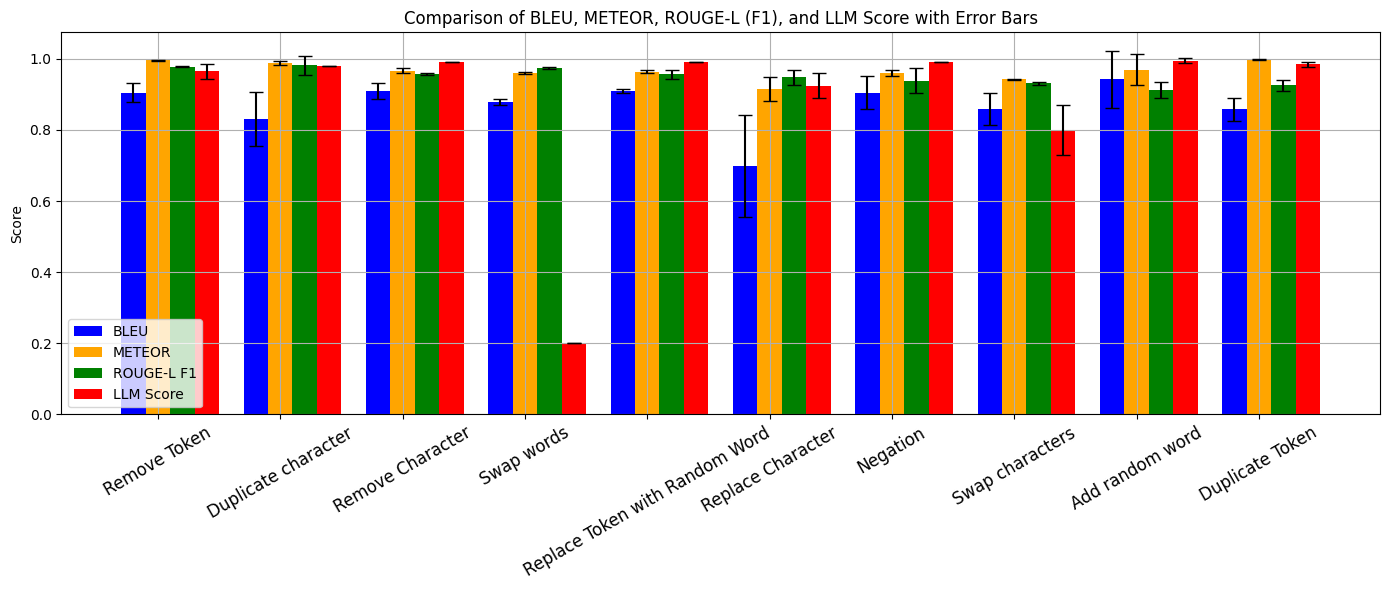

In [ ]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()  
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()


bleu_std = df.groupby("tamperingType")["BLEU"].std()
meteor_std = df.groupby("tamperingType")["METEOR"].std()
rouge_std = df.groupby("tamperingType")["Rougel f"].std()
llm_std = df.groupby("tamperingType")["LLM-Sim"].std()


x = np.arange(len(tampering_types))  
width = 0.2 

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_std, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_std, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_std, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_std, capsize=5, label="LLM Score", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1), and LLM Score with Error Bars")
ax.set_xticks(x)
ax.set_xticklabels(tampering_types, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


### Error bars using mean and min/max

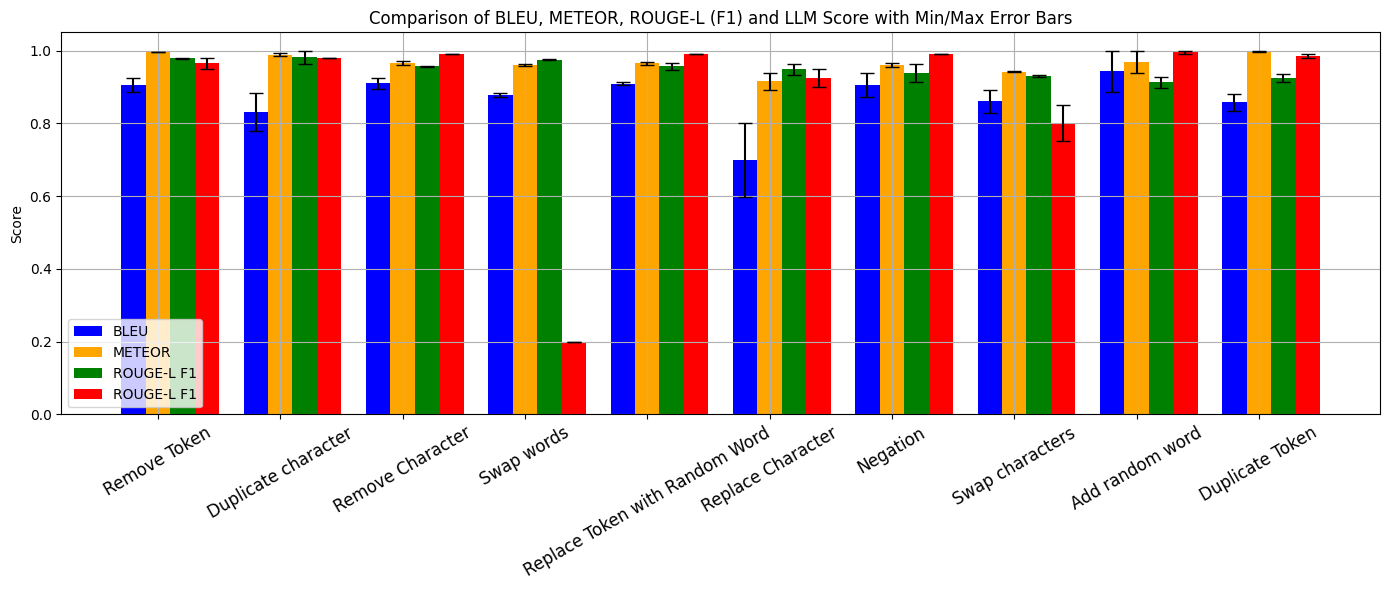

In [ ]:
tampering_types = df["tamperingType"].unique()

bleu_mean = df.groupby("tamperingType")["BLEU"].mean()
meteor_mean = df.groupby("tamperingType")["METEOR"].mean()
rouge_mean = df.groupby("tamperingType")["Rougel f"].mean()
llm_mean = df.groupby("tamperingType")["LLM-Sim"].mean()

bleu_min = df.groupby("tamperingType")["BLEU"].min()
bleu_max = df.groupby("tamperingType")["BLEU"].max()

meteor_min = df.groupby("tamperingType")["METEOR"].min()
meteor_max = df.groupby("tamperingType")["METEOR"].max()

rouge_min = df.groupby("tamperingType")["Rougel f"].min()
rouge_max = df.groupby("tamperingType")["Rougel f"].max()

llm_min = df.groupby("tamperingType")["LLM-Sim"].min()
llm_max = df.groupby("tamperingType")["LLM-Sim"].max()

bleu_errors = [bleu_mean - bleu_min, bleu_max - bleu_mean]
meteor_errors = [meteor_mean - meteor_min, meteor_max - meteor_mean]
rouge_errors = [rouge_mean - rouge_min, rouge_max - rouge_mean]
llm_errors = [llm_mean - llm_min, llm_max - llm_mean]

x = np.arange(len(tampering_types))  
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, bleu_mean, width, yerr=bleu_errors, capsize=5, label="BLEU", color="blue")

bars2 = ax.bar(x, meteor_mean, width, yerr=meteor_errors, capsize=5, label="METEOR", color="orange")

bars3 = ax.bar(x + width, rouge_mean, width, yerr=rouge_errors, capsize=5, label="ROUGE-L F1", color="green")

bars4 = ax.bar(x + width*2, llm_mean, width, yerr=llm_errors, capsize=5, label="ROUGE-L F1", color="red")

ax.set_ylabel("Score")
ax.set_title("Comparison of BLEU, METEOR, ROUGE-L (F1) and LLM Score with Min/Max Error Bars")
ax.set_xticks(x)
ax.set_xticklabels(tampering_types, rotation=30, fontsize=12)
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


In [31]:
import seaborn as sns
data = pandas.read_csv("output.csv", encoding='utf-8')

In [32]:
tampering_types = df["tamperingType"].unique()

c:\Users\Phong Phan\miniconda3\envs\LLM\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


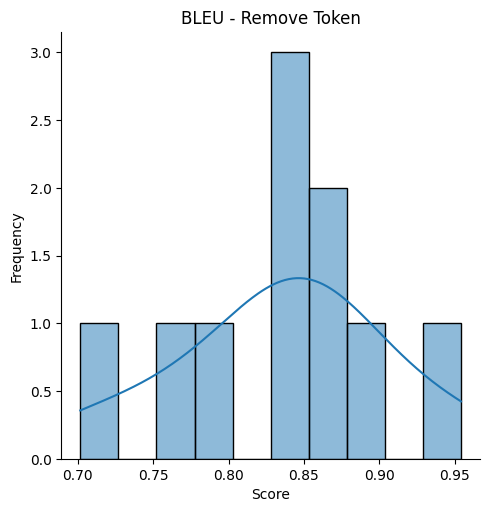

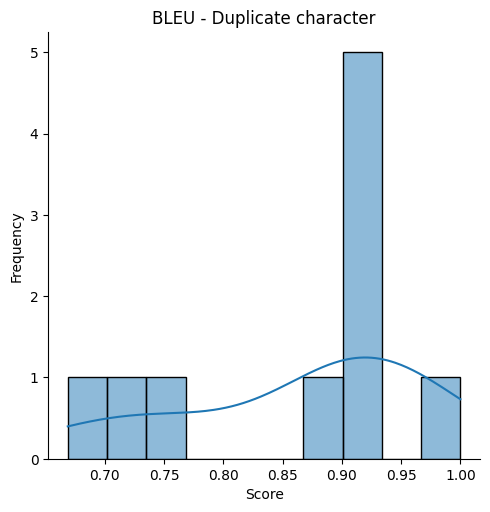

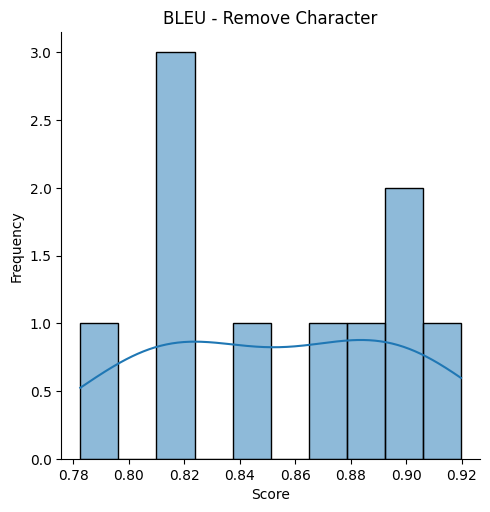

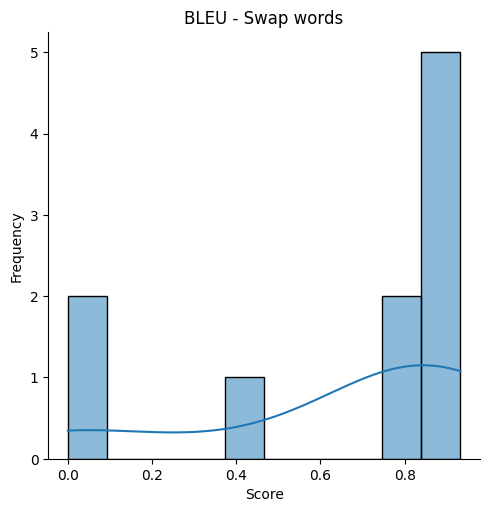

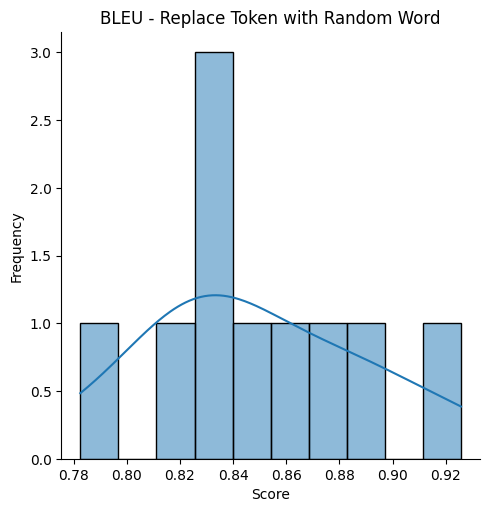

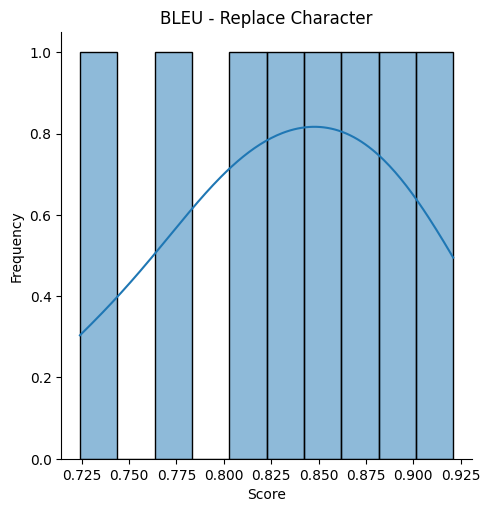

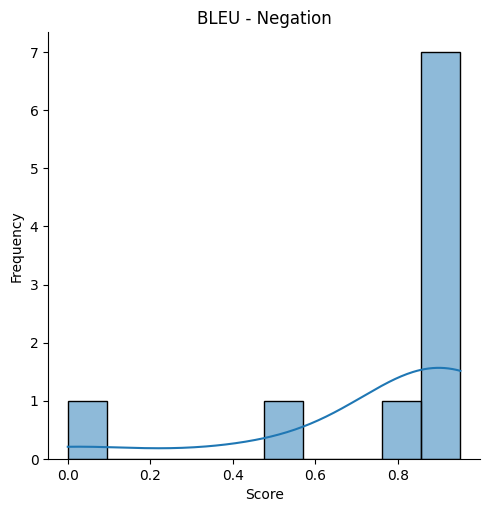

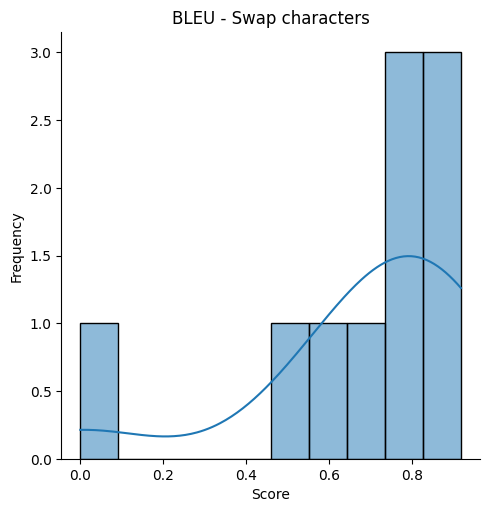

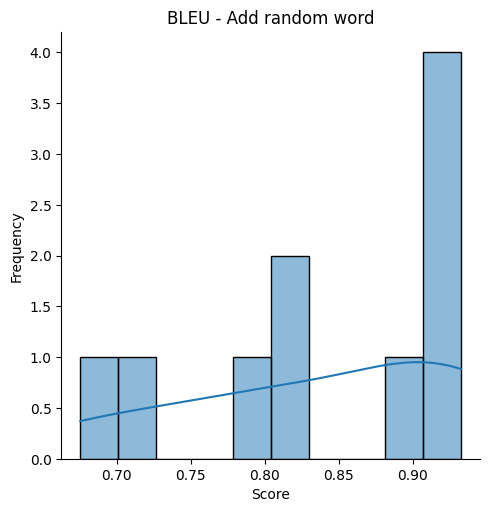

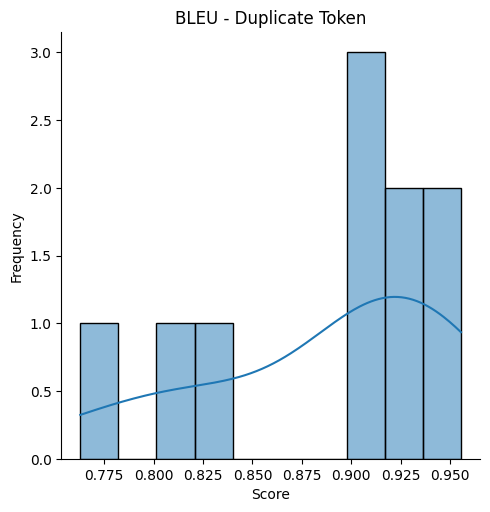

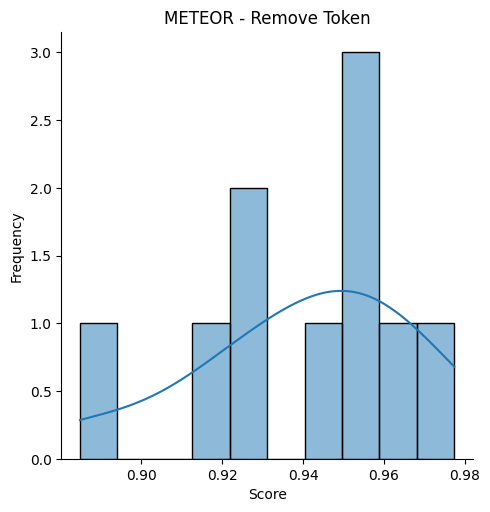

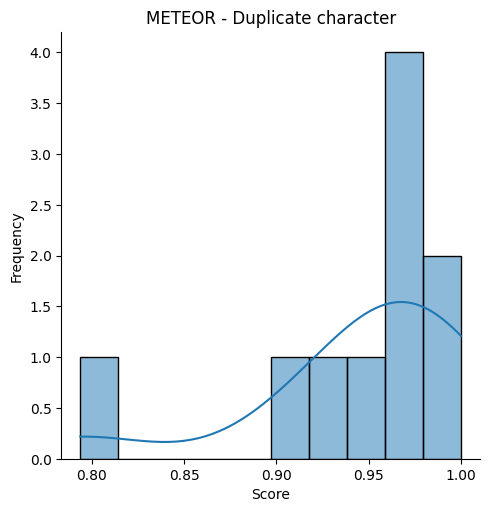

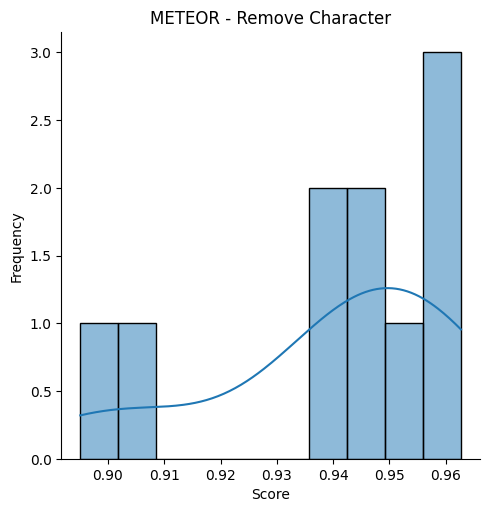

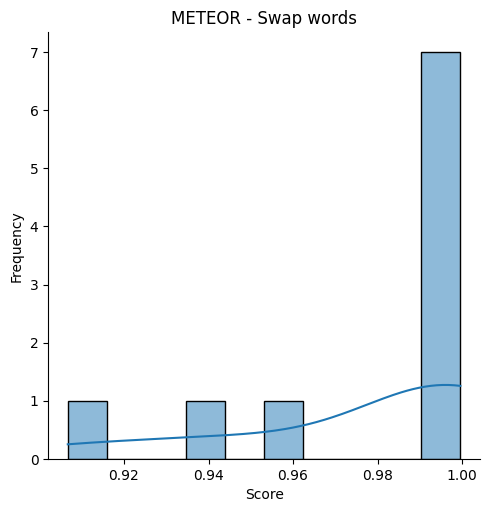

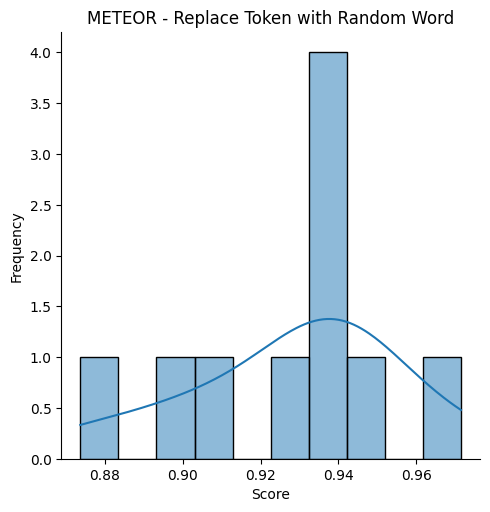

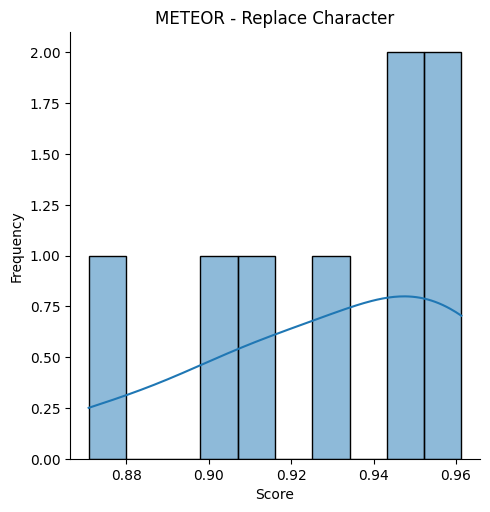

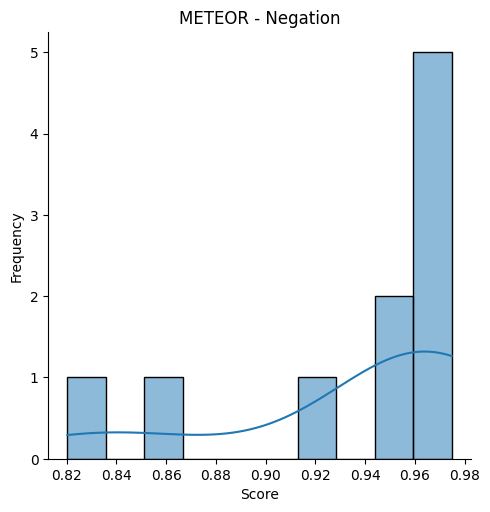

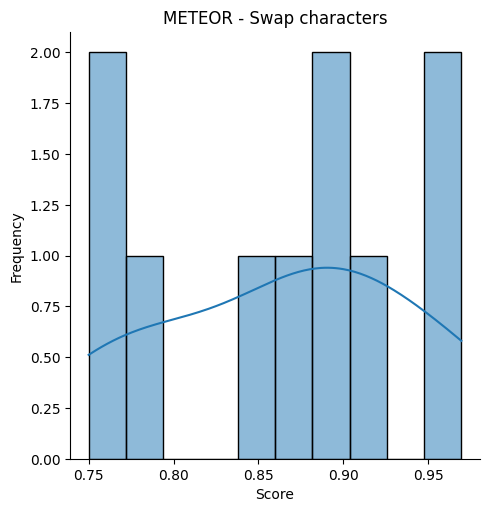

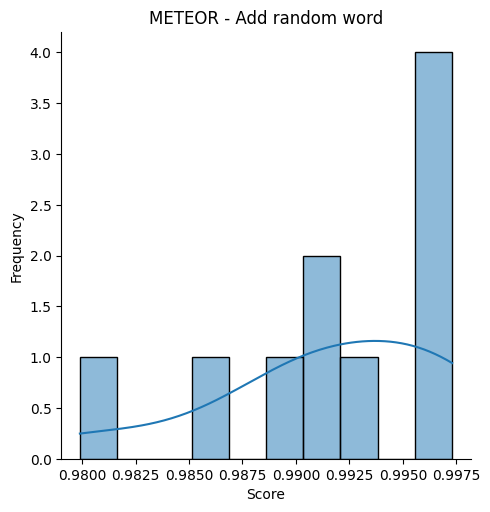

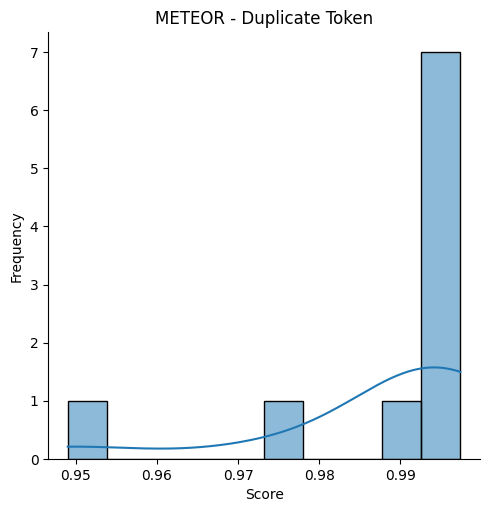

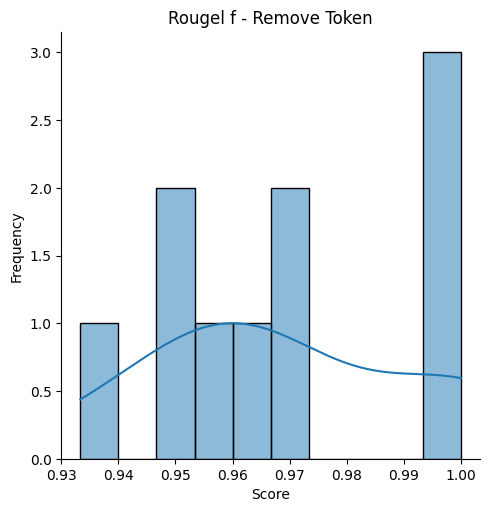

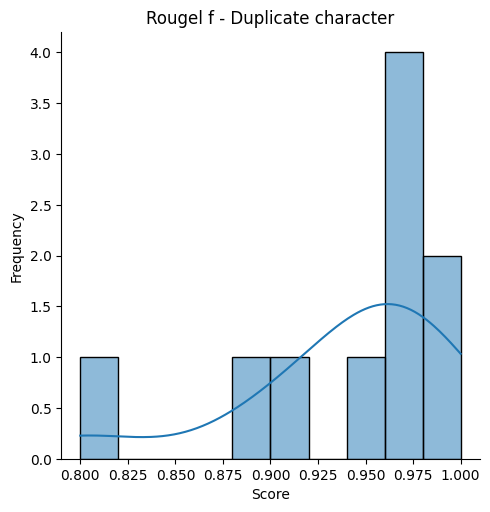

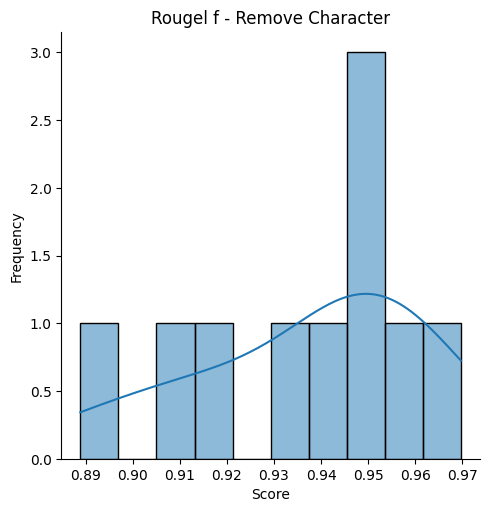

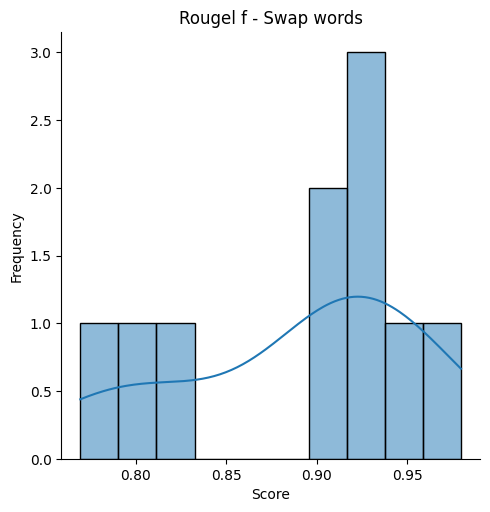

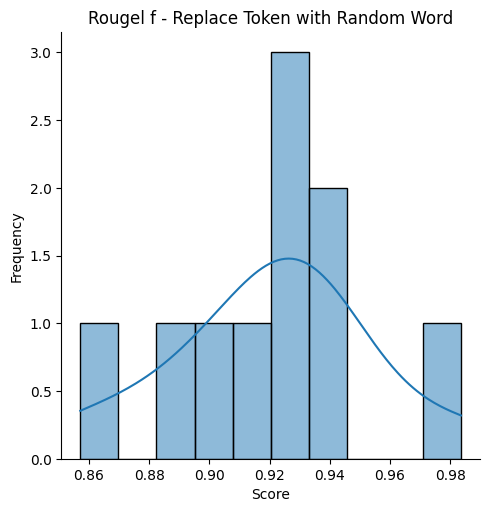

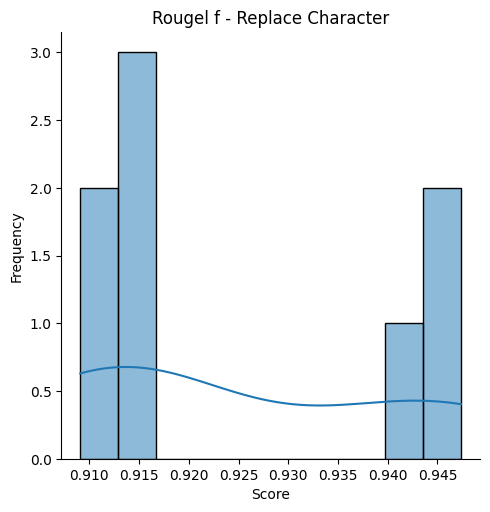

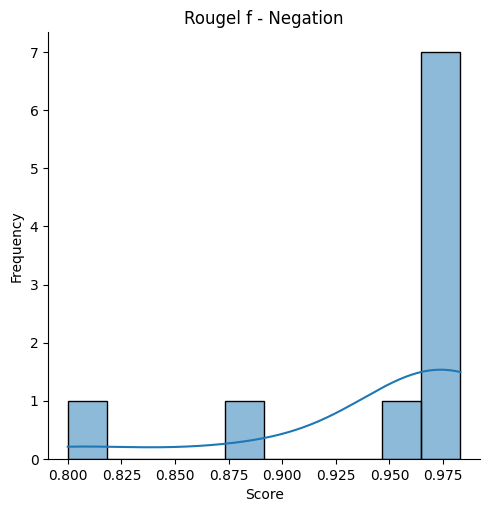

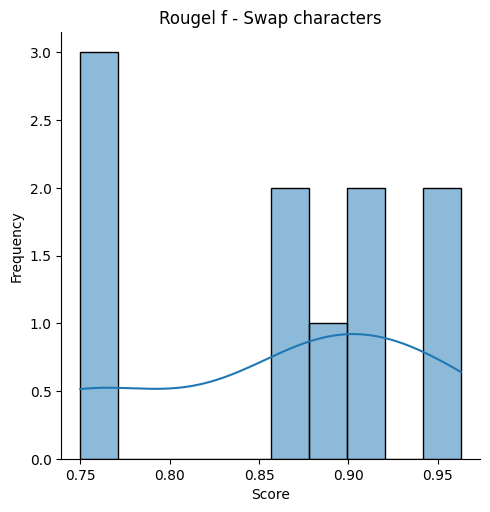

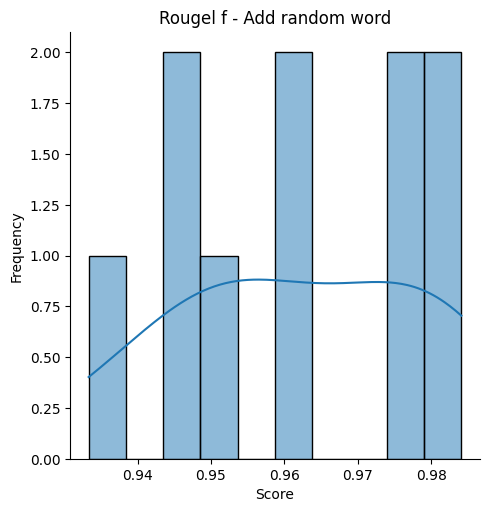

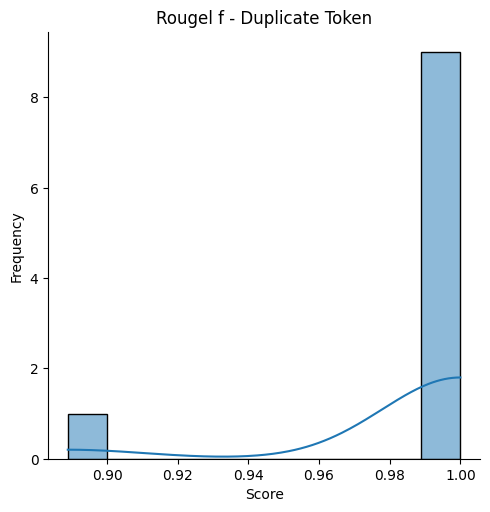

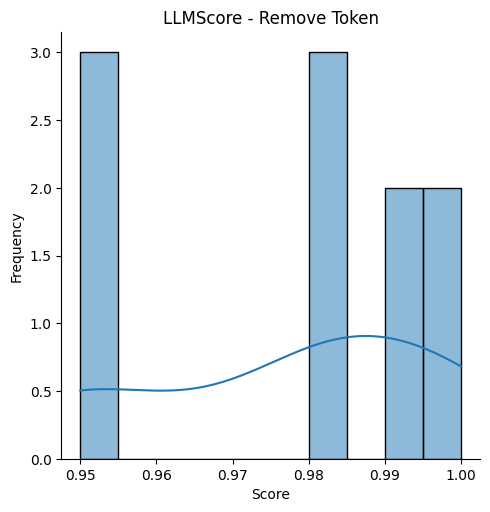

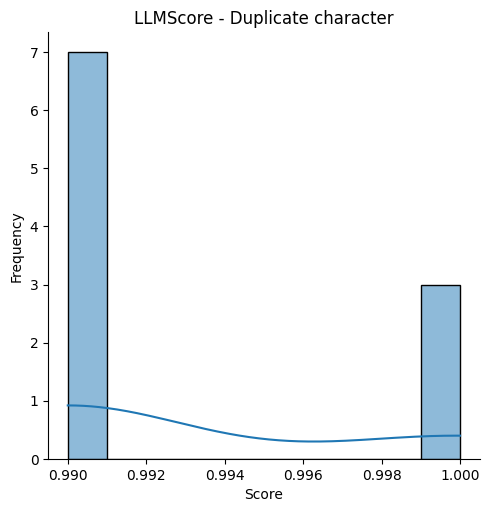

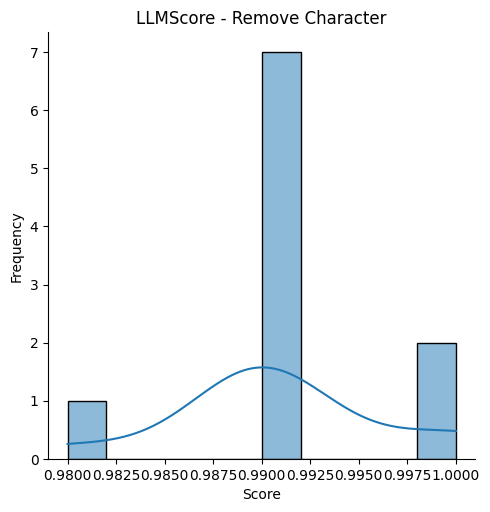

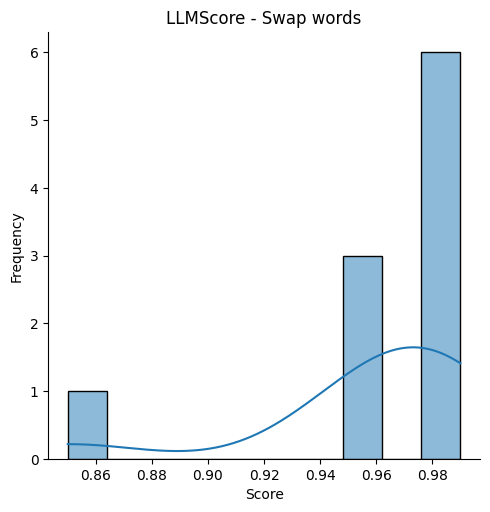

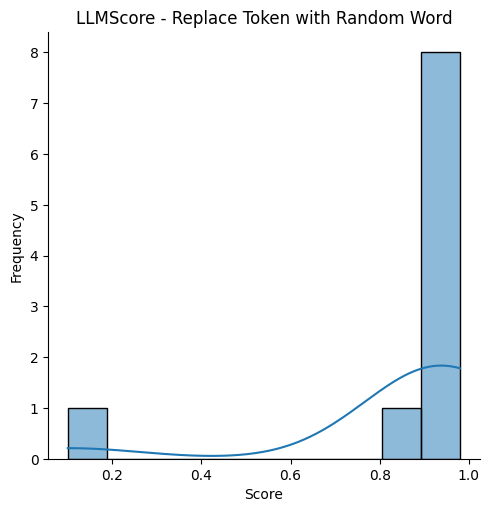

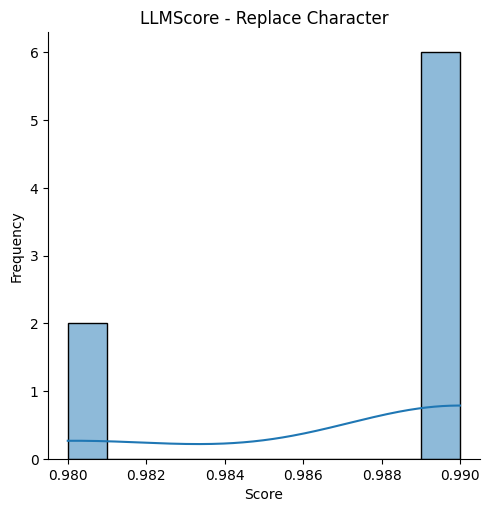

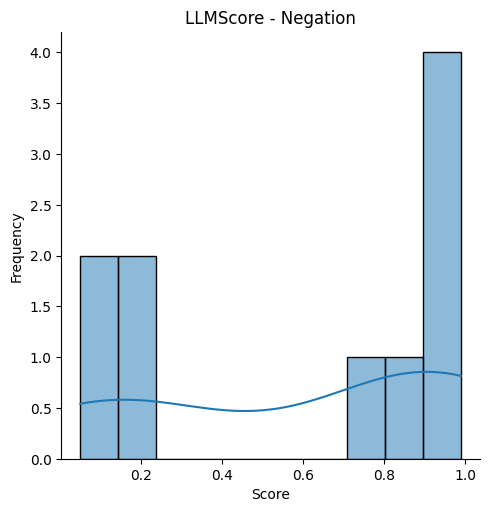

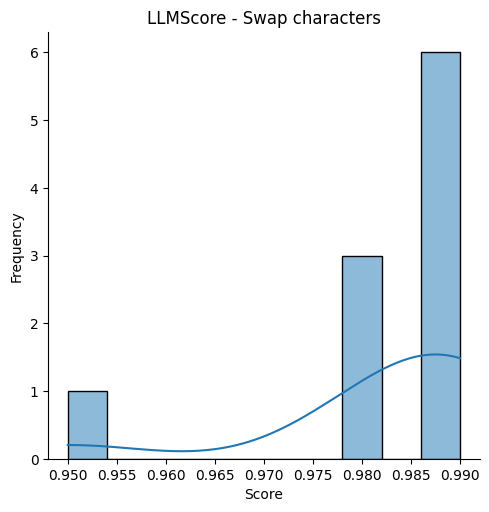

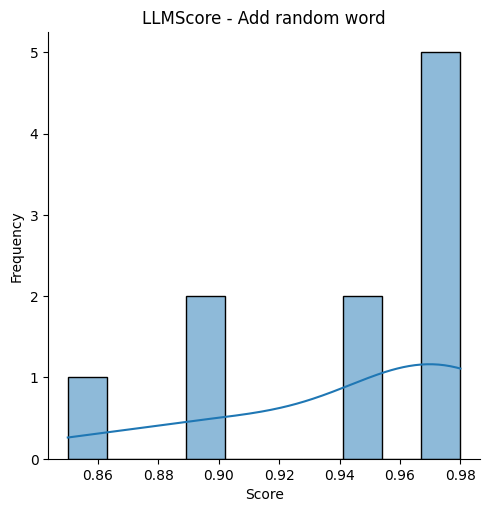

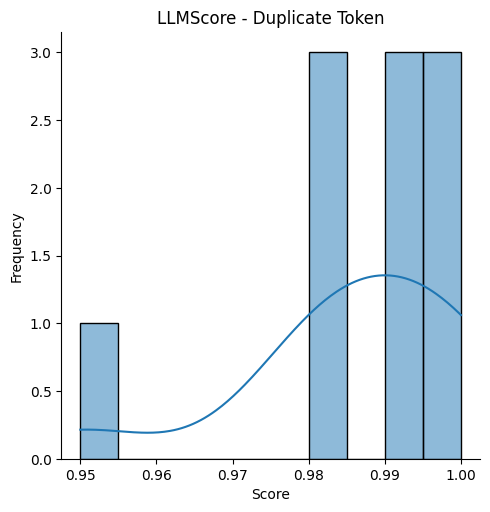

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.displot.html

columns_of_interest = ['BLEU', 'METEOR', 'Rougel f', 'LLM-Sim']

for col in columns_of_interest:
    for tam_type in tampering_types:
        g = sns.displot(data=data[(data["tamperingType"]==tam_type)], x=col, kde=True, bins = 10)
        g.set_axis_labels("Score", "Frequency")
        g.set(title = f"{col} - {tam_type}")
    